In [41]:
Markdown("""# Results Compilation and Algorithms performance comparison""")

# Results Compilation and Algorithms performance comparison

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use("seaborn-whitegrid")
from IPython.display import Markdown

In [2]:
class LogParser:
    def __init__(self, csv, nrows):
        self.df = pd.read_csv(csv, nrows=nrows)
    
    @property
    def score(self):
        return self.df["scores"].values
    
    @property
    def loss(self):
        return self.df["loss"].values
    
    def _avg(self, vals, epoch):
        num = vals.shape[0]
        vals = vals.reshape(num // epoch, -1)
        return np.average(vals, axis=1)
    
    def avg_score(self, epoch):
        return self._avg(self.score, epoch)
    
    def avg_loss(self, epoch):
        return self._avg(self.loss, epoch)

In [35]:
Markdown("""# Scores - DQN""")

# Scores - DQN

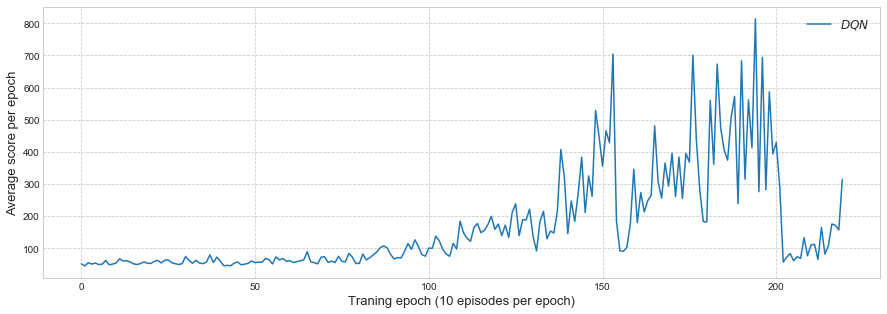

In [3]:
nrows = 2200
dqn = LogParser("./objects_dqn/scores_df.csv", nrows)

plt.figure(figsize=(15, 5))
plt.plot(dqn.avg_score(10), label=r'$DQN$')
plt.xlabel("Traning epoch (10 episodes per epoch)", fontsize=13)
plt.ylabel("Average score per epoch", fontsize=13)
plt.legend(fontsize='large')
plt.grid(linestyle='--')

In [36]:
Markdown(""" # Scores - DDQN vs DQN""")

 # Scores - DDQN vs DQN

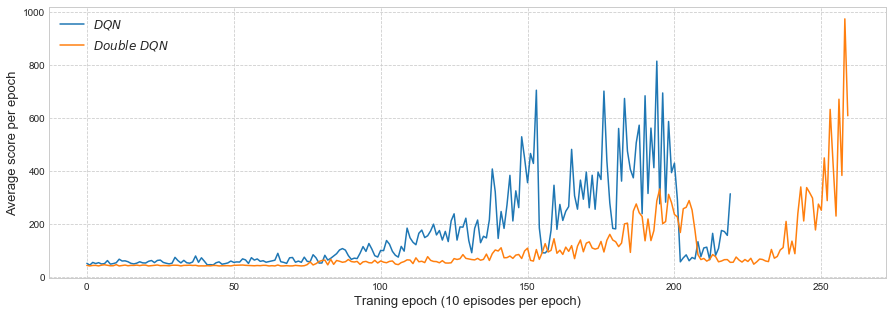

In [4]:
nrows = 2600
double_dqn = LogParser("./objects_ddqn/scores_df.csv", nrows)

plt.figure(figsize=(15,5))
plt.plot(dqn.avg_score(10), label=r'$DQN$')
plt.plot(double_dqn.avg_score(10), label=r'$Double\,\,DQN$')
plt.xlabel("Traning epoch (10 episodes per epoch)", fontsize=13)
plt.ylabel("Average score per epoch", fontsize=13)
plt.legend(fontsize='large')
plt.grid(linestyle='--')

In [37]:
Markdown(""" # Scores - SARSA vs DQN""")

 # Scores - SARSA vs DQN

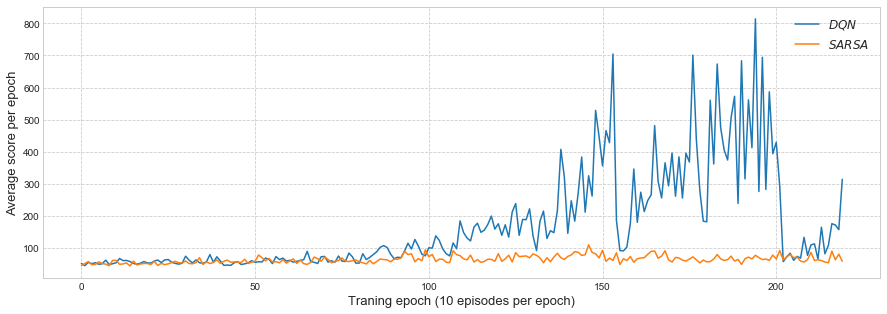

In [5]:
nrows = 2200
exp_sarsa = LogParser("./objects_sarsa/scores_df.csv", nrows)

plt.figure(figsize=(15, 5))
plt.plot(dqn.avg_score(10), label=r'$DQN$')
plt.plot(exp_sarsa.avg_score(10), label=r'$SARSA$')
plt.xlabel("Traning epoch (10 episodes per epoch)", fontsize=13)
plt.ylabel("Average score per epoch", fontsize=13)
plt.legend(fontsize='large')
plt.grid(linestyle='--')

In [34]:
Markdown("""# Loss Values - DQN""")


# Loss Values - DQN

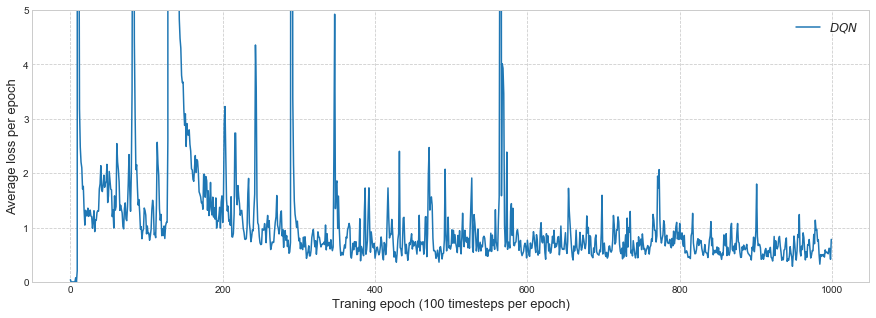

In [6]:
nrows = 100000
dqn = LogParser("./objects_dqn/loss_df.csv", nrows)
plt.figure(figsize=(15, 5))
plt.plot(dqn.avg_loss(100), label=r'$DQN$')
plt.ylim(0,5)
plt.xlabel("Traning epoch (100 timesteps per epoch)", fontsize=13)
plt.ylabel("Average loss per epoch", fontsize=13)
plt.legend(fontsize='large')
plt.grid(linestyle='--')

In [38]:
Markdown("""# Loss Values - DDQN vs DQN""")

# Loss Values - DDQN vs DQN

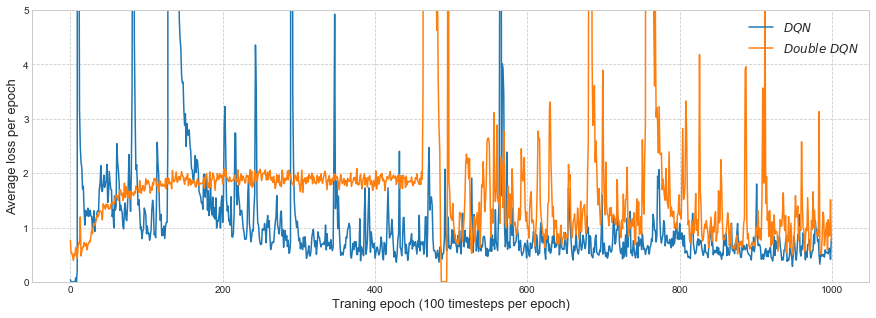

In [7]:
nrows = 100000
double_dqn = LogParser("./objects_ddqn/loss_df.csv", nrows)

plt.figure(figsize=(15, 5))
plt.plot(dqn.avg_loss(100), label=r'$DQN$')
plt.plot(double_dqn.avg_loss(100), label=r'$Double\,\,DQN$')
plt.ylim(0,5)
plt.xlabel("Traning epoch (100 timesteps per epoch)", fontsize=13)
plt.ylabel("Average loss per epoch", fontsize=13)
plt.legend(fontsize='large')
plt.grid(linestyle='--')

In [39]:
Markdown("""# Loss Values - SARSA vs DQN""")

# Loss Values - SARSA vs DQN

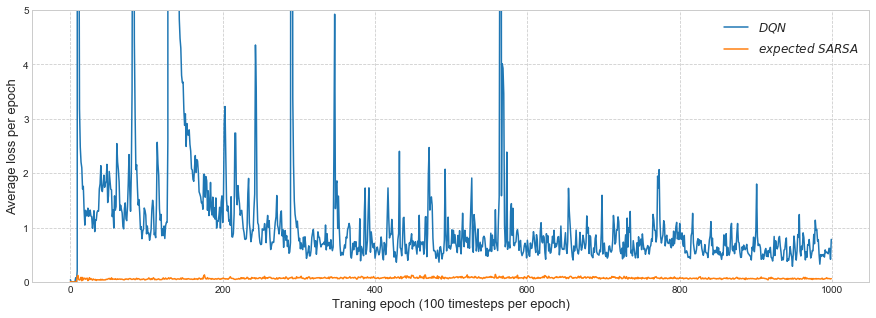

In [8]:
nrows = 100000
expe_sarsa = LogParser("./objects_sarsa/loss_df.csv", nrows)

plt.figure(figsize=(15, 5))
plt.plot(dqn.avg_loss(100), label=r'$DQN$')
plt.plot(expe_sarsa.avg_loss(100), label=r'$expected\,\,SARSA$')
plt.ylim(0,5)
plt.xlabel("Traning epoch (100 timesteps per epoch)", fontsize=13)
plt.ylabel("Average loss per epoch", fontsize=13)
plt.legend(fontsize='large')
plt.grid(linestyle='--')

In [40]:
Markdown("""# Timestep vs Scores Comparison""")

# Timestep vs Scores Comparison

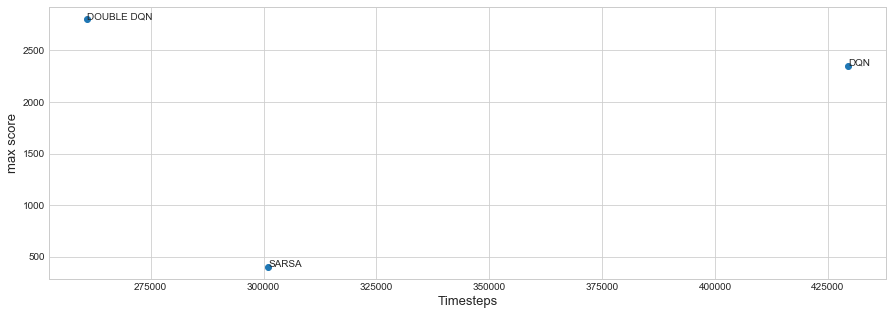

In [25]:
timesteps = [300990,429400,260861]
max_score = [405,2351,2800]
labels = ['SARSA','DQN','DOUBLE DQN']

fig, ax = plt.subplots(figsize=(15,5))
ax.scatter(timesteps, max_score)
ax.set_xlabel("Timesteps",fontsize=13)
ax.set_ylabel("max score",fontsize=13)
for i, txt in enumerate(labels):
    ax.annotate(txt, (timesteps[i], max_score[i]))


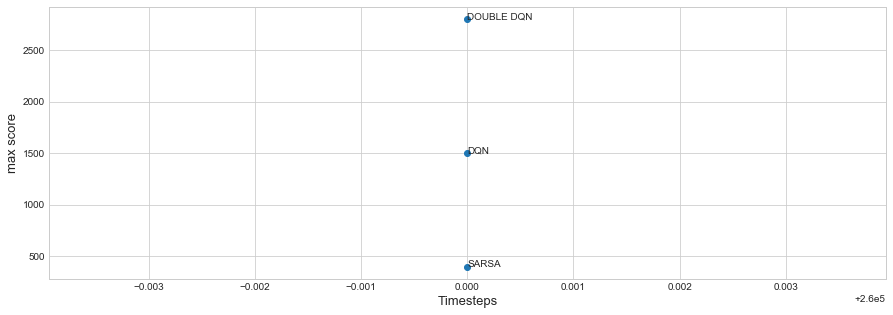

In [27]:
#scaling down to equal timesteps for better visualization
timesteps = [260000,260000,260000]
max_score = [398,1498,2800]
labels = ['SARSA','DQN','DOUBLE DQN']

fig, ax = plt.subplots(figsize=(15,5))
ax.scatter(timesteps, max_score)
ax.set_xlabel("Timesteps",fontsize=13)
ax.set_ylabel("max score",fontsize=13)
for i, txt in enumerate(labels):
    ax.annotate(txt, (timesteps[i], max_score[i]))